<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Predict_execution_time_with_input_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 02 (26/04/2021)</b></h1>

## **1. YÊU CẦU:**
- Cho dataset có sẵn (data2.csv)
- Xây dựng model từ dataset có sẵn để dự đoán các dataset khác (data3.csv, data4.csv) sao cho sai số càng nhỏ càng tốt

## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Predict_execution_time_with_input_size.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Predict_execution_time_with_input_size.ipynb)
- Link GitHub dataset: [Dataset](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/26_04_2021)

## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**

1. Thư viện pandas: https://pandas.pydata.org/docs/

### **4.2. Code**

#### **4.2.1. Thêm thư viện, đọc dữ liệu, kiểm tra dữ liệu**
- Đường dẫn thư mục trên Colab: `/content/CS114.L21/Colab/CSV/26_04_2021/` (Tự cho sao cho trùng với tên thư mục của GitHub)
- Kiểm tra thư mục đó xem có tồn tại hay không:
  - Nếu có thì thực hiện tiếp các lệnh tiếp theo
  - Nếu không có thì clone dữ liệu từ GitHub về (Dữ liệu ở mục 3)
- Đọc dữ liệu bằng thư viện `pandas`
- Kiểm tra dữ liệu có bị thiếu không (N/A) bằng `isna()`

In [ ]:
# Thêm các thư viện cần thiết
import os
import numpy as np
import pandas as pd

# Đường dẫn thư mục dataset
dir_dataset_folder = "/content/CS114.L21/Colab/CSV/26_04_2021/"

# Nếu không có đường dẫn thì clone từ GitHub về
if not os.path.exists(dir_dataset_folder):
    !git clone https://github.com/caohungphu/CS114.L21.git

# Đọc dữ liệu từ file CSV và gán header cho file (Size, Time)
headers = ["Size", "Time"]
data_2 = pd.read_csv(dir_dataset_folder + 'data2.csv', names=headers)
data_3 = pd.read_csv(dir_dataset_folder + 'data3.csv', names=headers)
data_4 = pd.read_csv(dir_dataset_folder + 'data4.csv', names=headers)

# Kiểm tra dữ liệu có dòng nào NULL hay không
print(data_2.isnull().sum())
print(data_3.isnull().sum())
print(data_4.isnull().sum())

# data2.csv
x_2 = np.array(data_2['Size']).reshape(-1, 1)
y_2 = np.array(data_2['Time'])

# data3.csv
x_3 = np.array(data_3['Size']).reshape(-1, 1)
y_3 = np.array(data_3['Time'])

# data4.csv
x_4 = np.array(data_4['Size']).reshape(-1, 1)
y_4 = np.array(data_4['Time'])

Size    0
Time    0
dtype: int64
Size    0
Time    0
dtype: int64
Size    0
Time    0
dtype: int64


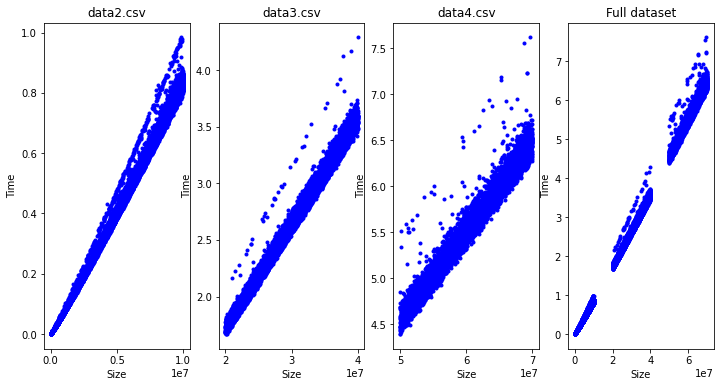

In [ ]:
# Mô hình hóa dữ liệu bằng thư viện matplotlib.pyplot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# data2.csv
plt.subplot(1, 4, 1)
plt.plot(x_2, y_2, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('data2.csv')

# data3.csv
plt.subplot(1, 4, 2)
plt.plot(x_3, y_3, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('data3.csv')

# data4.csv
plt.subplot(1, 4, 3)
plt.plot(x_4, y_4, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('data4.csv')

# Full Dataset
plt.subplot(1, 4, 4)
plt.plot(x_2, y_2, 'b.')
plt.plot(x_3, y_3, 'b.')
plt.plot(x_4, y_4, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Full dataset')
plt.show()

#### **4.2.2. Xây dựng mô hình Linear Regression**

In [ ]:
# Thêm thư viện cần thiết
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Hàm in kết quả
def printResult(y, y_pre):
  data_mse = mean_squared_error(y, y_pre)
  data_mae = mean_absolute_error(y, y_pre)
  print("Mean squared error: ", data_mse)
  print("Mean absolute error: ", data_mae)
  

# Hàm biểu diễn kết quả
def showResult(x, y, y_pre, title):
  plt.figure(figsize=(5, 5))
  plt.plot(x, y, 'b.')
  plt.plot(x, y_pre, 'r-')
  plt.xlabel('Size')
  plt.ylabel('Time')
  plt.title(title)
  plt.show

##### 4.2.2.1 $x$ 

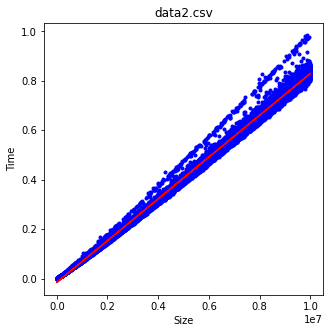

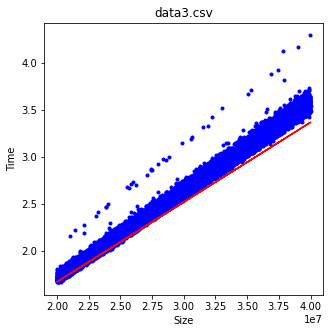

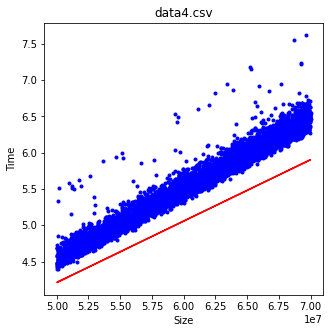

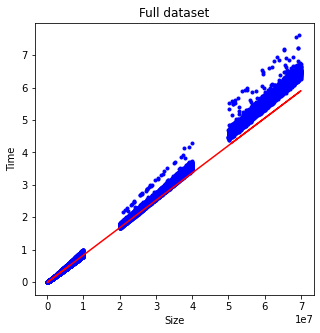

In [ ]:
from sklearn.linear_model import LinearRegression
lR_2 = LinearRegression().fit(x_2, y_2)

# print("===== DATA 2 =====")
y_2_pre = lR_2.predict(x_2)
showResult(x_2, y_2, y_2_pre, 'data2.csv')

# print("===== DATA 3 =====")
y_3_pre = lR_2.predict(x_3)
showResult(x_3, y_3, y_3_pre, 'data3.csv')

# print("===== DATA 4 =====")
y_4_pre = lR_2.predict(x_4)
showResult(x_4, y_4, y_4_pre, 'data4.csv')

x_full = np.concatenate((x_2, x_3, x_4))
y_full = np.concatenate((y_2, y_3, y_4))
y_pre_full = np.concatenate((y_2_pre, y_3_pre, y_4_pre))
showResult(x_full, y_full, y_pre_full, 'Full dataset')

In [ ]:
print("==DATA_2==")
print("Score:",lR_2.score(x_2, y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2.score(x_3, y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2.score(x_4, y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9975924993345859
Mean squared error:  0.00014337728721748835
Mean absolute error:  0.008291970317762349
==DATA_3==
Score: 0.9284132208349453
Mean squared error:  0.020664949397549082
Mean absolute error:  0.12271198006925235
==DATA_4==
Score: 0.3156839605365861
Mean squared error:  0.22348476817426036
Mean absolute error:  0.4520113867328918


##### **4.2.2.2 $x*\log{x}$**

In [ ]:

import math

def newFeature(x):
  return x * np.log(x)# * x #x^2

lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [ ]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9979508756229112
Mean squared error:  0.00012203439798746085
Mean absolute error:  0.006899424814228178
==DATA_3==
Score: 0.9814873856972811
Mean squared error:  0.005344034781896934
Mean absolute error:  0.0578374410090226
==DATA_4==
Score: 0.9392671566404105
Mean squared error:  0.019834206179683112
Mean absolute error:  0.11175157703649906


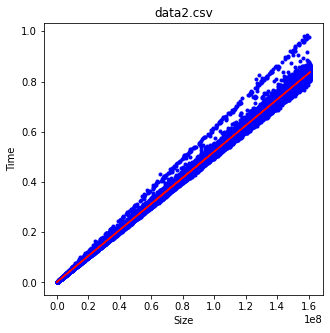

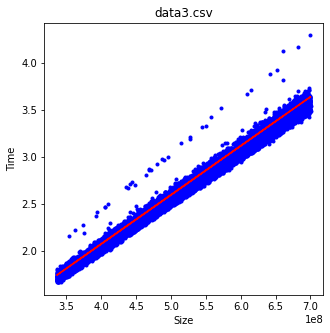

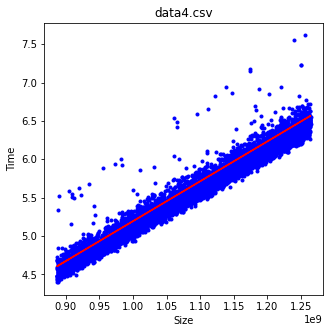

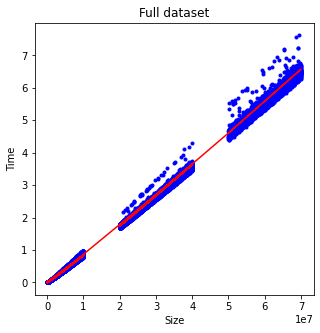

In [ ]:
# print("===== DATA 2 =====")
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.csv')

# print("===== DATA 3 =====")
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.csv')

# print("===== DATA 4 =====")
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.csv')

x_full = np.concatenate((x_2, x_3, x_4))
y_full = np.concatenate((y_2, y_3, y_4))
y_pre_full = np.concatenate((y_2_pre, y_3_pre, y_4_pre))
showResult(x_full, y_full, y_pre_full, 'Full dataset')

##### **4.2.2.3 $\sqrt{x}$**


In [ ]:
import math
def newFeature(x):
  return np.sqrt(x)

lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [ ]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9502474508661091
Mean squared error:  0.0029629838236181426
Mean absolute error:  0.0442600235201748
==DATA_3==
Score: -4.203751977247067
Mean squared error:  1.5021666366532145
Mean absolute error:  1.1685883761248108
==DATA_4==
Score: -33.101852256967724
Mean squared error:  11.137024571186847
Mean absolute error:  3.3060079484578493


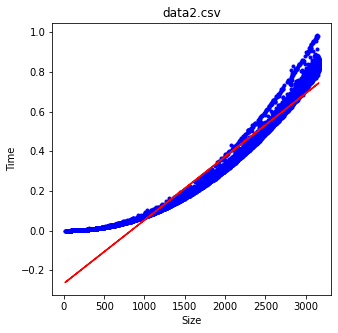

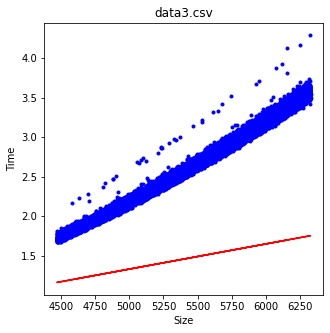

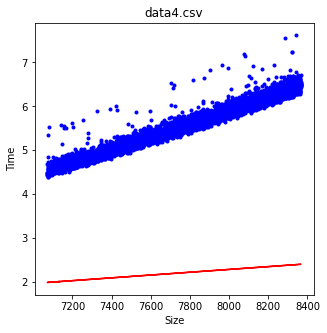

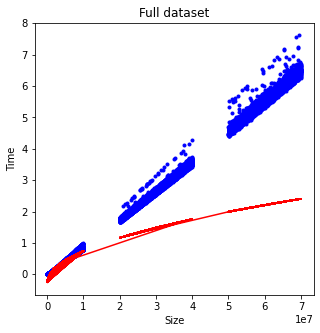

In [ ]:
# print("===== DATA 2 =====")
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.csv')

# print("===== DATA 3 =====")
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.csv')

# print("===== DATA 4 =====")
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.csv')

x_full = np.concatenate((x_2, x_3, x_4))
y_full = np.concatenate((y_2, y_3, y_4))
y_pre_full = np.concatenate((y_2_pre, y_3_pre, y_4_pre))
showResult(x_full, y_full, y_pre_full, 'Full dataset')

##### **4.2.2.4 $x^2$**

In [ ]:
import math
def newFeature(x):
  return x**x

lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [ ]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 2.1684629553209156e-05
Mean squared error:  0.05955312087503156
Mean absolute error:  0.2114574662724637
==DATA_3==
Score: -17.32010016931905
Mean squared error:  5.288461743531206
Mean absolute error:  2.2360217304038783
==DATA_4==
Score: -79.75834383938083
Mean squared error:  26.374158590865765
Mean absolute error:  5.103683684381674


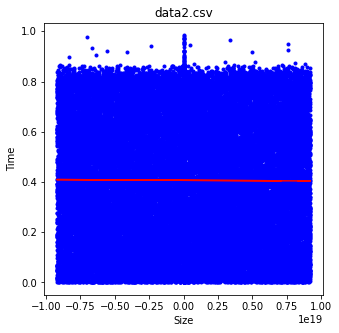

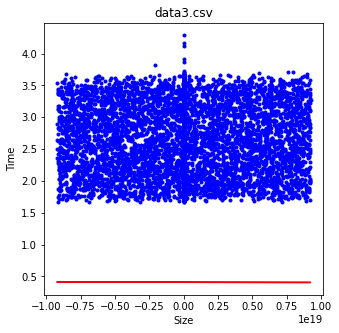

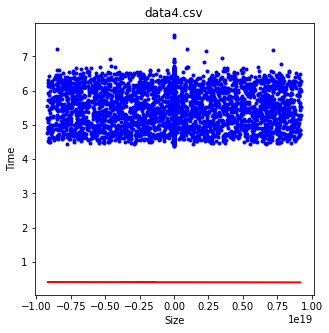

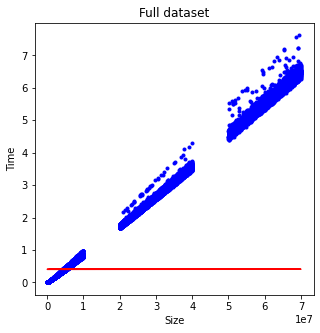

In [ ]:
# print("===== DATA 2 =====")
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.csv')

# print("===== DATA 3 =====")
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.csv')

# print("===== DATA 4 =====")
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.csv')

x_full = np.concatenate((x_2, x_3, x_4))
y_full = np.concatenate((y_2, y_3, y_4))
y_pre_full = np.concatenate((y_2_pre, y_3_pre, y_4_pre))
showResult(x_full, y_full, y_pre_full, 'Full dataset')

##### **4.2.2.5 $\log{x}$**

In [ ]:
import math
def newFeature(x):
  return np.log(x)

lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [ ]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.7328304713150897
Mean squared error:  0.015911124262733084
Mean absolute error:  0.10132358795296757
==DATA_3==
Score: -11.10764375137704
Mean squared error:  3.495112482555936
Mean absolute error:  1.8023551218608231
==DATA_4==
Score: -62.55736013520594
Mean squared error:  20.75664031888278
Mean absolute error:  4.522414327224627


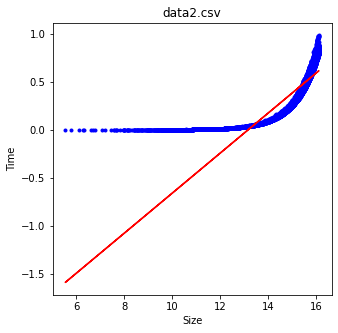

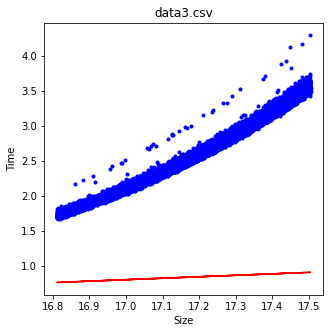

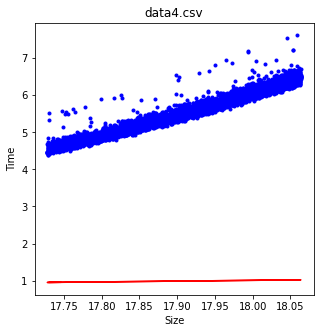

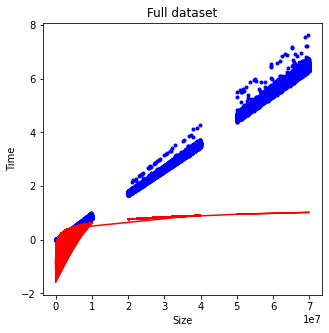

In [ ]:
# print("===== DATA 2 =====")
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.csv')

# print("===== DATA 3 =====")
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.csv')

# print("===== DATA 4 =====")
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.csv')

x_full = np.concatenate((x_2, x_3, x_4))
y_full = np.concatenate((y_2, y_3, y_4))
y_pre_full = np.concatenate((y_2_pre, y_3_pre, y_4_pre))
showResult(x_full, y_full, y_pre_full, 'Full dataset')

## **5. NHẬN XÉT VÀ TRẢ LỜI YÊU CẦU ĐỀ BÀI**

### **5.1. Nhận xét**


Sau khi kiểm thử trên nhiều feature (x, x*log(x), log(x), sqrt(x), x^2) nhóm chúng em nhận thấy với x = x*log(x) thì module dự đoán tốt nhất. Đánh giá module hiệu quả tốt nhất vì kết quả hàm loss trên tập training và tập test đều xấp xỉ nhau và gần bằng 0.

### **5.2. Trả lời yêu cầu đề bài**


Giá trị trả về của Loss Function bao nhiêu là tốt?
Theo nhóm em, khi giá trị Loss Function của cả tập training và tập test đều xấp xỉ nhau và càng gần bằng nhau thì càng tốt. Còn cần có một giá trị cụ thể để đánh giá là tốt hay không thì phải dựa vào yêu cầu của bài toán đặt ra cho phép kết quả dự đoán sai lệch trong khoảng bao nhiêu thì có thể chấp nhận được.